<a href="https://colab.research.google.com/github/harshkharwar1204/Deepfake_audio_detection/blob/main/Deepfake_Audio_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
import os
import librosa

def load_audio_files(folder_path):
    audio_data = []
    labels = []

    for subfolder in ["training", "TESTING", "validation"]:  # Dataset splits
        subfolder_path = os.path.join(folder_path, subfolder)

        for category in ["fake", "real"]:  # Class labels
            category_path = os.path.join(subfolder_path, category)

            if os.path.exists(category_path):  # Ensure folder exists
                for file_name in os.listdir(category_path):
                    if file_name.endswith(".wav"):  # Load only .wav files
                        file_path = os.path.join(category_path, file_name)
                        audio, sr = librosa.load(file_path, sr=None)
                        audio_data.append(audio)
                        labels.append(category)  # Store 'fake' or 'real'

    return audio_data, labels

# Set the dataset path
dataset_path = "/content/drive/MyDrive/Deepfake_detection/for-rerecorded/"

# Load the dataset
audio_data, labels = load_audio_files(dataset_path)
print(f"Loaded {len(audio_data)} audio files with labels: {set(labels)}")


Loaded 12892 audio files with labels: {'real', 'fake'}


In [98]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [99]:
data_paths = {
    "train_fake": '/content/drive/MyDrive/Deepfake_detection/for-rerecorded/training/fake',
    "train_real": '/content/drive/MyDrive/Deepfake_detection/for-rerecorded/training/real',
    "val_fake": '/content/drive/MyDrive/Deepfake_detection/for-rerecorded/validation/fake',
    "val_real": '/content/drive/MyDrive/Deepfake_detection/for-rerecorded/validation/real',
    "test_fake": '/content/drive/MyDrive/Deepfake_detection/for-rerecorded/TESTING/fake',
    "test_real": '/content/drive/MyDrive/Deepfake_detection/for-rerecorded/TESTING/real',
}

In [100]:
import os
import torchaudio
import librosa
import numpy as np

def describe_dataset(data_paths):
    stats = {}

    for key, path in data_paths.items():
        label = 'Fake' if 'fake' in key else 'Real'
        split = key.split('_')[0].capitalize()
        stats_key = f"{split}_{label}"
        stats[stats_key] = {
            'count': 0,
            'durations': [],
            'sample_rates': [],
            'channels': []
        }

        for file in os.listdir(path):
            if file.endswith('.wav'):
                file_path = os.path.join(path, file)
                waveform, sr = torchaudio.load(file_path)
                duration = waveform.shape[1] / sr
                channels = waveform.shape[0]
                stats[stats_key]['count'] += 1
                stats[stats_key]['durations'].append(duration)
                stats[stats_key]['sample_rates'].append(sr)
                stats[stats_key]['channels'].append(channels)

    # Display Results
    total_files = 0
    for group, data in stats.items():
        print(f"\n--- {group.upper()} ---")
        print(f"Total Files       : {data['count']}")
        print(f"Avg Duration (s)  : {np.mean(data['durations']):.2f}" if data['durations'] else "N/A")
        print(f"Min Duration (s)  : {np.min(data['durations']):.2f}" if data['durations'] else "N/A")
        print(f"Max Duration (s)  : {np.max(data['durations']):.2f}" if data['durations'] else "N/A")
        print(f"Sample Rates      : {set(data['sample_rates'])}")
        print(f"Channel Counts    : {set(data['channels'])}")
        total_files += data['count']

    print(f"\n📦 Total Audio Files in Dataset: {total_files}")

# Run it
describe_dataset(data_paths)



--- TRAIN_FAKE ---
Total Files       : 5104
Avg Duration (s)  : 1.97
Min Duration (s)  : 1.45
Max Duration (s)  : 2.42
Sample Rates      : {16000}
Channel Counts    : {1}

--- TRAIN_REAL ---
Total Files       : 5134
Avg Duration (s)  : 1.95
Min Duration (s)  : 1.53
Max Duration (s)  : 2.48
Sample Rates      : {16000}
Channel Counts    : {1}

--- VAL_FAKE ---
Total Files       : 1153
Avg Duration (s)  : 1.98
Min Duration (s)  : 1.53
Max Duration (s)  : 2.46
Sample Rates      : {16000}
Channel Counts    : {1}

--- VAL_REAL ---
Total Files       : 1101
Avg Duration (s)  : 1.95
Min Duration (s)  : 1.52
Max Duration (s)  : 2.43
Sample Rates      : {16000}
Channel Counts    : {1}

--- TEST_FAKE ---
Total Files       : 174
Avg Duration (s)  : 1.98
Min Duration (s)  : 1.63
Max Duration (s)  : 2.22
Sample Rates      : {16000}
Channel Counts    : {1}

--- TEST_REAL ---
Total Files       : 226
Avg Duration (s)  : 1.97
Min Duration (s)  : 1.74
Max Duration (s)  : 2.01
Sample Rates      : {16000}


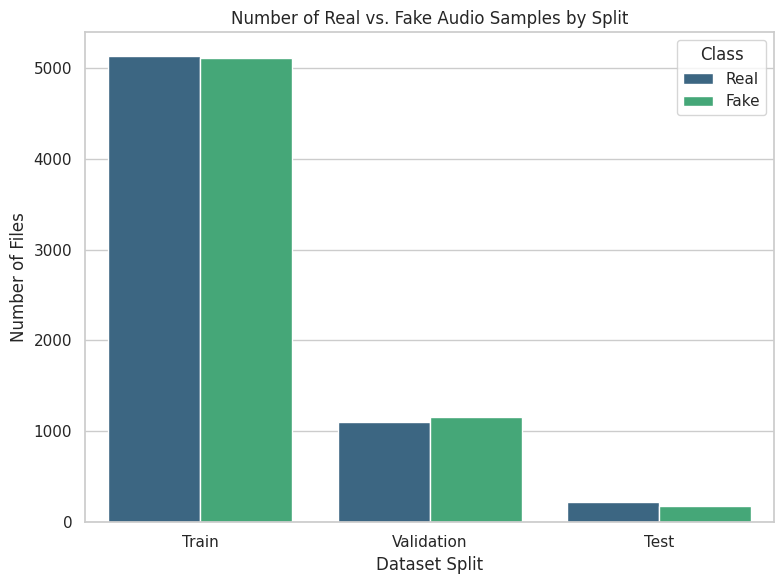

In [101]:
# In Colab, to render plots inline
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Updated Dataset Split Stats
# -----------------------------
data = {
    'Train':      {'Real': 5134, 'Fake': 5104},
    'Validation': {'Real': 1101, 'Fake': 1153},
    'Test':       {'Real': 226, 'Fake': 174}
}

# -----------------------------
# 2. Melt to long form for Seaborn
# -----------------------------
splits, labels, counts = [], [], []
for split, class_counts in data.items():
    for label, count in class_counts.items():
        splits.append(split)
        labels.append(label)
        counts.append(count)

# -----------------------------
# 3. Plot Styling
# -----------------------------
sns.set(style="whitegrid")

# -----------------------------
# 4. Bar Plot: Real vs. Fake per Split
# -----------------------------
plt.figure(figsize=(8, 6))
sns.barplot(x=splits, y=counts, hue=labels, palette='viridis')
plt.title("Number of Real vs. Fake Audio Samples by Split")
plt.xlabel("Dataset Split")
plt.ylabel("Number of Files")
plt.legend(title="Class")
plt.tight_layout()
plt.show()


<ipython-input-102-7998f497b0a4>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='label', palette='Set2')


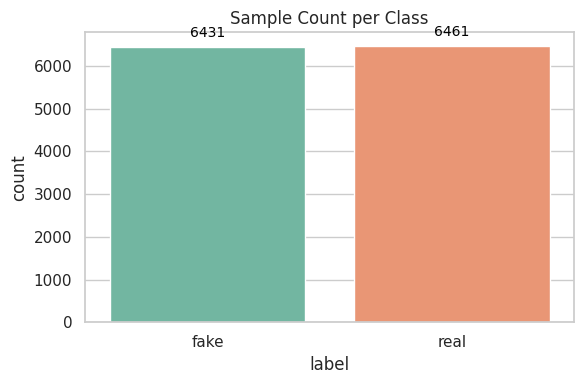

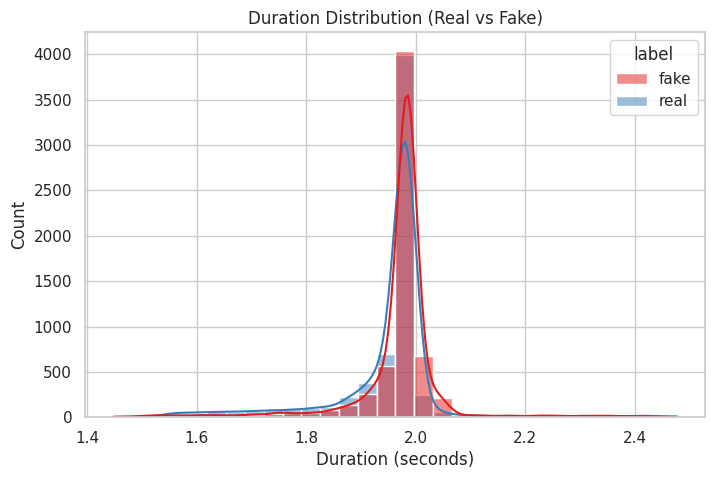

<ipython-input-102-7998f497b0a4>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='sample_rate', palette='coolwarm')


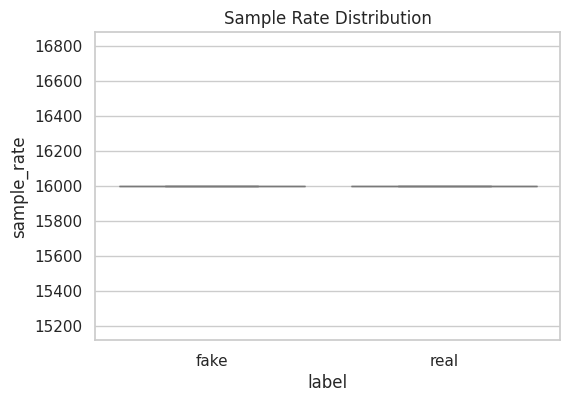

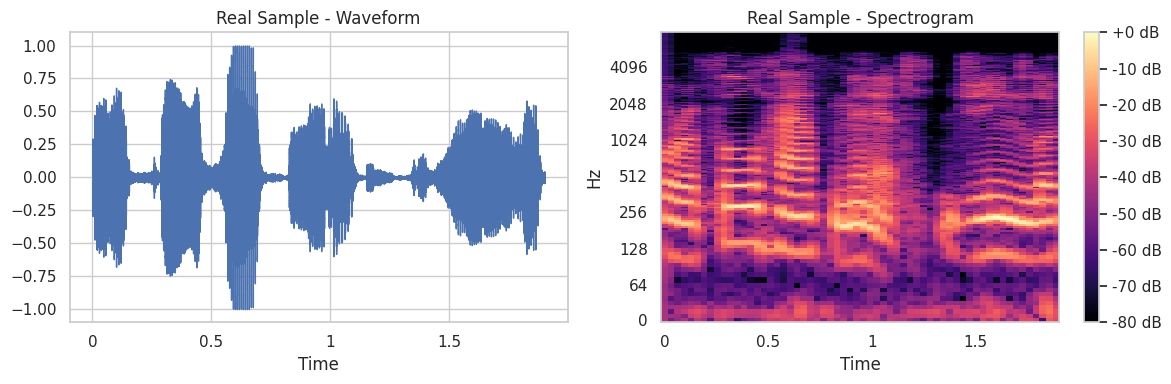

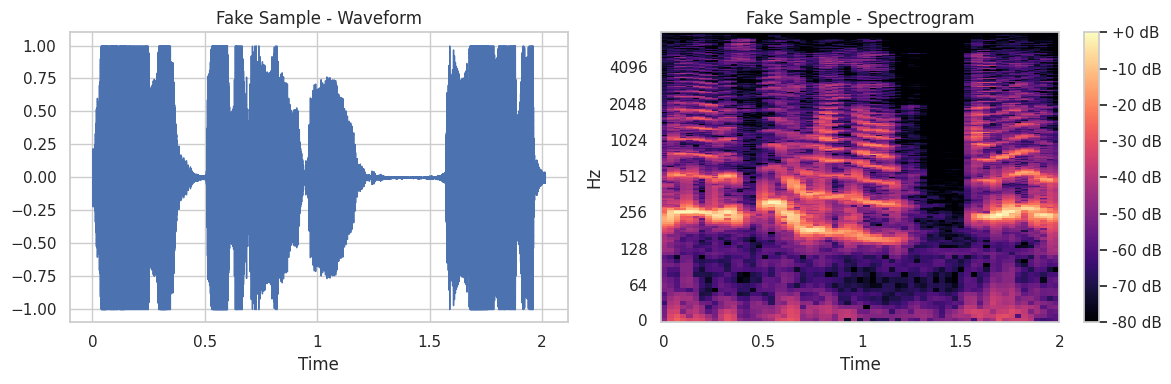

In [102]:
# Function to collect basic info
def get_audio_stats(folder, label):
    stats = []
    for filename in os.listdir(folder):
        if filename.endswith('.wav'):
            file_path = os.path.join(folder, filename)
            y, sr = librosa.load(file_path, sr=None)
            duration = librosa.get_duration(y=y, sr=sr)
            stats.append({
                'filename': filename,
                'duration': duration,
                'sample_rate': sr,
                'label': label
            })
    return stats

# Gather all metadata
all_stats = []
for key, path in data_paths.items():
    label = 'real' if 'real' in key else 'fake'
    stats = get_audio_stats(path, label)
    all_stats.extend(stats)

# Convert to DataFrame
df = pd.DataFrame(all_stats)

# ---------------------- EDA Plots ----------------------

# 1. Sample count per class (with counts on top)
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='label', palette='Set2')
plt.title("Sample Count per Class")

# Annotate each bar with its height
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(
        str(count),
        xy=(p.get_x() + p.get_width() / 2, p.get_height()),
        xytext=(0, 5),            # 5 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()


# 2. Duration distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='duration', hue='label', bins=30, kde=True, palette='Set1')
plt.title("Duration Distribution (Real vs Fake)")
plt.xlabel("Duration (seconds)")
plt.show()

# 3. Sample rate distribution
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='label', y='sample_rate', palette='coolwarm')
plt.title("Sample Rate Distribution")
plt.show()

# 4. Display a random waveform and spectrogram for each class
def plot_waveform_and_spectrogram(file_path, title):
    y, sr = librosa.load(file_path, sr=None)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"{title} - Waveform")

    plt.subplot(1, 2, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"{title} - Spectrogram")
    plt.tight_layout()
    plt.show()

# Pick one real and one fake sample from training set
sample_real = os.path.join(data_paths['train_real'], os.listdir(data_paths['train_real'])[0])
sample_fake = os.path.join(data_paths['train_fake'], os.listdir(data_paths['train_fake'])[0])

plot_waveform_and_spectrogram(sample_real, "Real Sample")
plot_waveform_and_spectrogram(sample_fake, "Fake Sample")

<ipython-input-118-d92689d6d929>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=zcr_df, x='label', y='mean_zcr', palette='pastel')


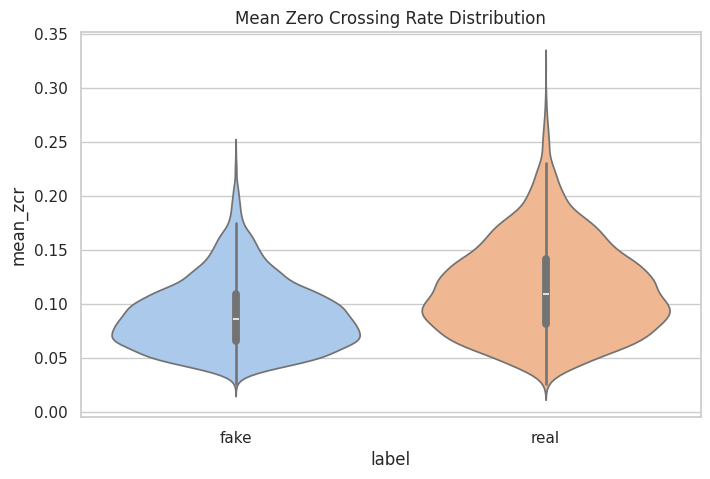

In [118]:
# Compute ZCR for each sample
def compute_zcr(folder, label):
    zcr_stats = []
    for filename in os.listdir(folder):
        if filename.endswith('.wav'):
            file_path = os.path.join(folder, filename)
            y, sr = librosa.load(file_path, sr=None)
            zcr = librosa.feature.zero_crossing_rate(y)[0]
            zcr_stats.append({
                'filename': filename,
                'mean_zcr': np.mean(zcr),
                'label': label
            })
    return zcr_stats

zcr_all = []
for key, path in data_paths.items():
    label = 'real' if 'real' in key else 'fake'
    zcr_all.extend(compute_zcr(path, label))

zcr_df = pd.DataFrame(zcr_all)

# Plot ZCR distribution
plt.figure(figsize=(8, 5))
sns.violinplot(data=zcr_df, x='label', y='mean_zcr', palette='pastel')
plt.title("Mean Zero Crossing Rate Distribution")
plt.show()


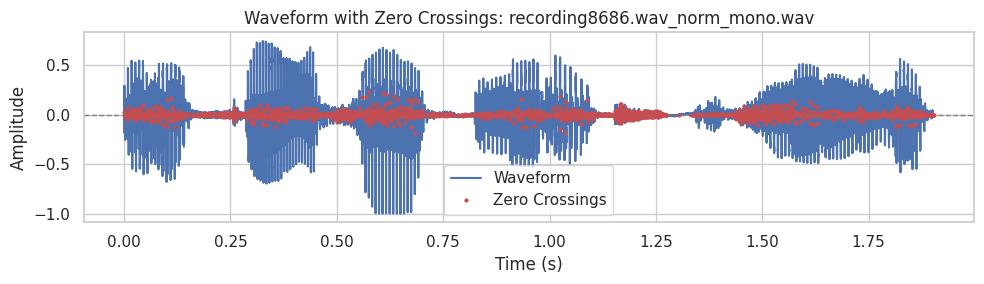

In [124]:
import librosa.display

# Find the first real sample and its corresponding folder path
real_sample = None
real_sample_path = None

for key, path in data_paths.items():
    if 'real' in key:
        for file in os.listdir(path):
            if file.endswith('.wav'):
                real_sample = file
                real_sample_path = os.path.join(path, file)
                break
        if real_sample_path:
            break

# Load the audio
y, sr = librosa.load(real_sample_path, sr=None)
times = np.arange(len(y)) / sr

# Detect zero crossings
zero_crossings = librosa.zero_crossings(y, pad=False)

# Plot waveform and zero crossings
plt.figure(figsize=(10, 3))
plt.plot(times, y, label='Waveform')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.plot(times[zero_crossings], y[zero_crossings], 'ro', markersize=2, label='Zero Crossings')

plt.title(f"Waveform with Zero Crossings: {real_sample}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()


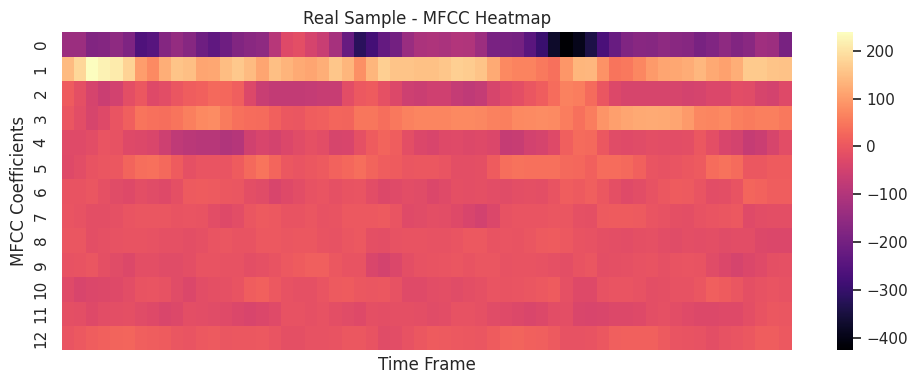

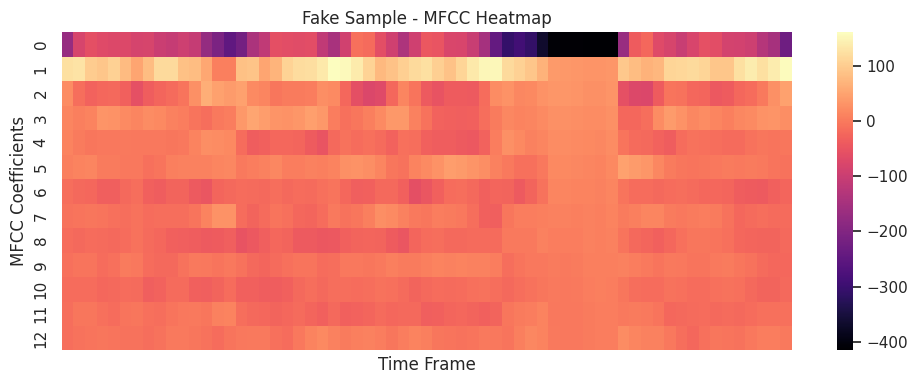

In [125]:
def plot_mfcc(file_path, title):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    plt.figure(figsize=(10, 4))
    sns.heatmap(mfccs, cmap='magma', xticklabels=False)
    plt.title(f'{title} - MFCC Heatmap')
    plt.ylabel("MFCC Coefficients")
    plt.xlabel("Time Frame")
    plt.tight_layout()
    plt.show()

plot_mfcc(sample_real, "Real Sample")
plot_mfcc(sample_fake, "Fake Sample")


In [126]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchaudio
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [127]:

# -----------------------------
# 2. Dataset Class
# -----------------------------
class DeepFakeAudioDataset(Dataset):
    def __init__(self, real_dir, fake_dir, sample_rate=16000, n_mels=64, max_width=160):
        """
        real_dir, fake_dir: directories containing .wav files.
        sample_rate: desired sample rate.
        n_mels: number of mel filterbanks.
        max_width: fixed time dimension (spectrogram frames) after padding/cropping.
        """
        self.sample_rate = sample_rate
        self.n_mels = n_mels
        self.max_width = max_width
        self.files = []

        # Label: 0 for real, 1 for fake.
        for directory, label in [(real_dir, 0), (fake_dir, 1)]:
            for file in os.listdir(directory):
                if file.endswith('.wav'):
                    self.files.append((os.path.join(directory, file), label))
        self.files.sort()  # sort for reproducibility

        # Pre-create transforms
        self.mel_transform = torchaudio.transforms.MelSpectrogram(
            sample_rate=self.sample_rate,
            n_mels=self.n_mels,
            n_fft=1024,
            hop_length=512
        )
        self.db_transform = torchaudio.transforms.AmplitudeToDB(top_db=80)

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        file_path, label = self.files[idx]
        waveform, sr = torchaudio.load(file_path)

        # Resample if needed
        if sr != self.sample_rate:
            resampler = torchaudio.transforms.Resample(sr, self.sample_rate)
            waveform = resampler(waveform)

        # Convert to mono if necessary
        if waveform.shape[0] > 1:
            waveform = waveform.mean(dim=0, keepdim=True)

        # Compute Mel spectrogram and convert to dB
        mel_spec = self.mel_transform(waveform)  # shape: [1, n_mels, time]
        mel_spec = self.db_transform(mel_spec)

        # Normalize (zero mean, unit std)
        mel_spec = (mel_spec - mel_spec.mean()) / (mel_spec.std() + 1e-6)

        # Pad or crop to fixed width along time axis
        _, n_mels, width = mel_spec.shape
        if width < self.max_width:
            pad_amt = self.max_width - width
            mel_spec = F.pad(mel_spec, (0, pad_amt))  # pad on right side
        elif width > self.max_width:
            mel_spec = mel_spec[:, :, :self.max_width]

        return mel_spec, torch.tensor(label, dtype=torch.long)


In [128]:

# -----------------------------
# 3. Create DataLoaders
# -----------------------------
BATCH_SIZE = 32

train_dataset = DeepFakeAudioDataset(data_paths["train_real"], data_paths["train_fake"])
val_dataset   = DeepFakeAudioDataset(data_paths["val_real"], data_paths["val_fake"])
test_dataset  = DeepFakeAudioDataset(data_paths["test_real"], data_paths["test_fake"])

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [129]:

# -----------------------------
# 4. Define the CNN Model (Baseline)
# -----------------------------
class SpectrogramCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SpectrogramCNN, self).__init__()
        # Input shape: [B, 1, 64, 160]
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)   # -> [B, 16, 64, 160]
        self.pool  = nn.MaxPool2d(kernel_size=2, stride=2)         # -> [B, 16, 32, 80]
        # Flattened feature size: 16 * 32 * 80 = 40960
        self.fc    = nn.Linear(16 * 32 * 80, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # [B, 16, 32, 80]
        x = x.view(x.size(0), -1)             # Flatten
        return self.fc(x)


In [130]:

# -----------------------------
# 5. Training and Evaluation Functions
# -----------------------------
def train_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in tqdm(loader, desc="Training", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    return running_loss / total, correct / total

def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return running_loss / total, correct / total, np.array(all_labels), np.array(all_preds)


In [131]:
# Set up device
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model architecture
model = SpectrogramCNN(num_classes=2).to(DEVICE)

# Load trained weights
model.load_state_dict(torch.load("/content/drive/MyDrive/Deepfake_detection/deepfake_model.pth", map_location=DEVICE))

# Set to evaluation mode
model.eval()

# (Optional, if you’re not training further)
criterion = nn.CrossEntropyLoss()


In [ ]:

# # -----------------------------
# # 7. Training Loop with Metric Logging
# # -----------------------------
# EPOCHS = 10
# train_losses, val_losses = [], []
# train_accs, val_accs = [], []

# for epoch in range(EPOCHS):
#     print(f"\nEpoch {epoch+1}/{EPOCHS}")
#     t_loss, t_acc = train_epoch(model, train_loader, optimizer, criterion, DEVICE)
#     v_loss, v_acc, _, _ = evaluate(model, val_loader, criterion, DEVICE)
#     train_losses.append(t_loss)
#     val_losses.append(v_loss)
#     train_accs.append(t_acc)
#     val_accs.append(v_acc)
#     print(f"Train Loss: {t_loss:.4f}, Train Acc: {t_acc:.4f}")
#     print(f"Val   Loss: {v_loss:.4f}, Val   Acc: {v_acc:.4f}")


In [133]:
# -----------------------------
# 8. Final Evaluation on Test Set and Get Predictions
# -----------------------------
test_loss, test_acc, test_labels, test_preds = evaluate(model, test_loader, criterion, DEVICE)
print(f"\nTest Loss: {test_loss:.4f}, Test Acc: {int(test_acc * 100)}%")



Test Loss: 0.1857, Test Acc: 94%


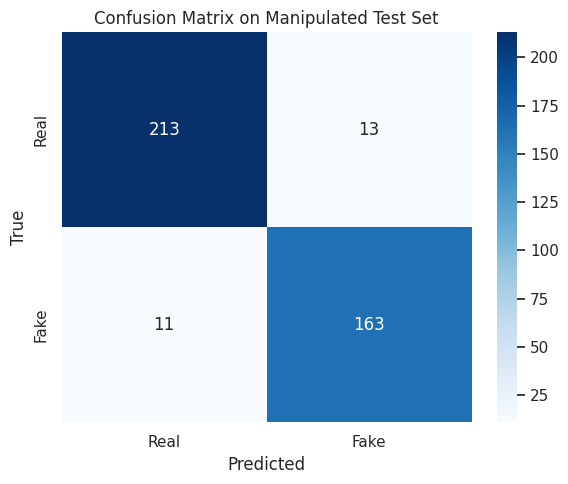

In [135]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Device setup
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
model = SpectrogramCNN(num_classes=2).to(DEVICE)
model.load_state_dict(torch.load("/content/drive/MyDrive/Deepfake_detection/deepfake_model.pth", map_location=DEVICE))
model.eval()

# Evaluate on test set
test_preds = []
test_labels = []

with torch.no_grad():
    for batch in test_loader:
        inputs, labels = batch
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)

        test_preds.extend(preds.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

# Plot confusion matrix
cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix on Manipulated Test Set")
plt.tight_layout()
plt.show()



In [136]:
# -----------------------------
# 10. Pipeline Function: Predict on a Single Audio File
# -----------------------------
def predict_single(model, file_path, sample_rate=16000, n_mels=64, max_width=160, device="cpu"):
    """
    Loads an audio file, preprocesses it, runs prediction using the trained model,
    and returns the predicted label (0: real, 1: fake) along with the model output.
    """
    model.eval()
    waveform, sr = torchaudio.load(file_path)

    # Resample if necessary
    if sr != sample_rate:
        resampler = torchaudio.transforms.Resample(sr, sample_rate)
        waveform = resampler(waveform)

    # Convert to mono if necessary
    if waveform.shape[0] > 1:
        waveform = waveform.mean(dim=0, keepdim=True)

    # Compute Mel spectrogram and convert to dB
    mel_transform = torchaudio.transforms.MelSpectrogram(
        sample_rate=sample_rate, n_mels=n_mels, n_fft=1024, hop_length=512
    )
    db_transform = torchaudio.transforms.AmplitudeToDB(top_db=80)
    mel_spec = mel_transform(waveform)
    mel_spec = db_transform(mel_spec)

    # Normalize
    mel_spec = (mel_spec - mel_spec.mean()) / (mel_spec.std() + 1e-6)

    # Pad or crop to fixed width
    _, n_mels, width = mel_spec.shape
    if width < max_width:
        pad_amt = max_width - width
        mel_spec = F.pad(mel_spec, (0, pad_amt))
    elif width > max_width:
        mel_spec = mel_spec[:, :, :max_width]

    # Add batch dimension and move to device
    mel_spec = mel_spec.unsqueeze(0).to(device)

    # Predict
    with torch.no_grad():
        output = model(mel_spec)
        pred = output.argmax(dim=1).item()

    return pred, output.cpu().numpy()

In [137]:
sample_audio = data_paths["test_real"] + "/" + os.listdir(data_paths["test_real"])[0]
predicted_label, output_vector = predict_single(model, sample_audio, device=DEVICE)
print(f"Predicted Label: {'Fake' if predicted_label==1 else 'Real'}")
print(f"Output Vector: {output_vector}")

Predicted Label: Real
Output Vector: [[ 3.0152936 -2.897655 ]]


In [121]:
def segment_and_classify(model, file_path, sample_rate=16000, window_duration=0.75, overlap=0.4,
                         n_mels=64, max_width=160, device="cpu"):

    model.eval()
    waveform, sr = torchaudio.load(file_path)

    # Resample if needed
    if sr != sample_rate:
        waveform = torchaudio.transforms.Resample(sr, sample_rate)(waveform)
    if waveform.shape[0] > 1:
        waveform = waveform.mean(dim=0, keepdim=True)

    total_samples = waveform.shape[1]
    window_size = int(window_duration * sample_rate)
    step_size = int(window_size * (1 - overlap))

    results = []
    for start in range(0, total_samples - window_size + 1, step_size):
        end = start + window_size
        chunk = waveform[:, start:end]

        # Compute mel spectrogram
        mel_transform = torchaudio.transforms.MelSpectrogram(
            sample_rate=sample_rate, n_mels=n_mels, n_fft=1024, hop_length=512
        )
        db_transform = torchaudio.transforms.AmplitudeToDB(top_db=80)
        mel_spec = mel_transform(chunk)
        mel_spec = db_transform(mel_spec)
        mel_spec = (mel_spec - mel_spec.mean()) / (mel_spec.std() + 1e-6)

        # Pad or crop
        _, n_mels, width = mel_spec.shape
        if width < max_width:
            mel_spec = F.pad(mel_spec, (0, max_width - width))
        elif width > max_width:
            mel_spec = mel_spec[:, :, :max_width]

        mel_spec = mel_spec.unsqueeze(0).to(device)

        # Predict
        with torch.no_grad():
            output = model(mel_spec)
            pred = output.argmax(dim=1).item()

        start_time = start / sample_rate
        end_time = end / sample_rate
        results.append((start_time, end_time, pred))

    return results


In [122]:
sample_audio = '/content/drive/MyDrive/Deepfake_detection/for-rerecorded/new.wav'

0.00s - 0.75s: Real
0.45s - 1.20s: Fake
0.90s - 1.65s: Real
1.35s - 2.10s: Real
1.80s - 2.55s: Fake
2.25s - 3.00s: Fake
2.70s - 3.45s: Real


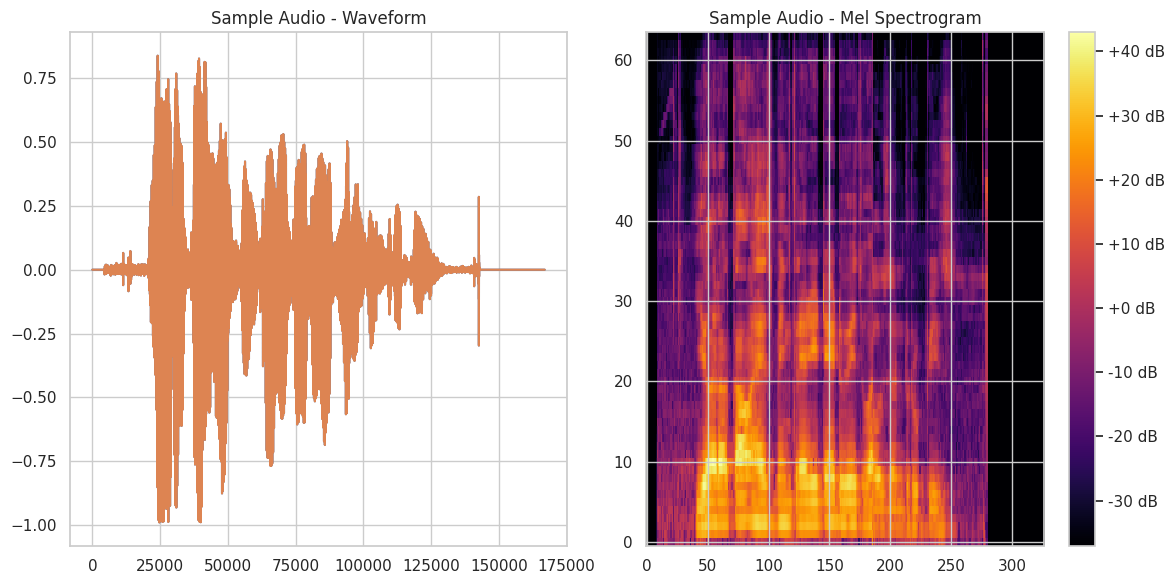

In [123]:
segments = segment_and_classify(model, sample_audio, window_duration=0.75, overlap=0.4, device=DEVICE)

# Plotting fake vs real sections with distinct segments
for start, end, pred in segments:  # Only unpack 3 values (start, end, pred)
    label = 'Fake' if pred == 1 else 'Real'
    print(f"{start:.2f}s - {end:.2f}s: {label}")

def plot_waveform_and_spectrogram(file_path, title):
    waveform, sr = torchaudio.load(file_path)

    # Mel Spectrogram Plot
    mel_transform = torchaudio.transforms.MelSpectrogram(sample_rate=sr, n_mels=64, n_fft=1024, hop_length=512)
    mel_spec = mel_transform(waveform)
    db_transform = torchaudio.transforms.AmplitudeToDB(top_db=80)
    mel_spec_db = db_transform(mel_spec)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(waveform.t().numpy())
    plt.title(f"{title} - Waveform")

    plt.subplot(1, 2, 2)
    plt.imshow(mel_spec_db[0].numpy(), cmap='inferno', origin='lower', aspect='auto', interpolation='none')
    plt.title(f"{title} - Mel Spectrogram")
    plt.colorbar(format="%+2.0f dB")
    plt.tight_layout()
    plt.show()

# Visualizing the waveform and spectrogram for the audio sample
plot_waveform_and_spectrogram(sample_audio, "Sample Audio")


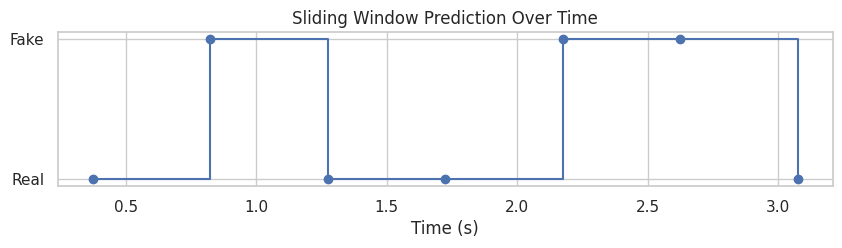

In [117]:
import matplotlib.pyplot as plt

# Extract midpoint times and labels
times = [(start + end)/2 for start, end, pred in segments]
labels = [pred for _, _, pred in segments]

plt.figure(figsize=(10, 2))
plt.plot(times, labels, drawstyle='steps-post', marker='o')
plt.yticks([0, 1], ['Real', 'Fake'])
plt.xlabel("Time (s)")
plt.title("Sliding Window Prediction Over Time")
plt.grid(True)
plt.show()
